In [3]:
import pandas as pd

#此处查看的是b榜数据
data = pd.read_csv("E:/招行数据比赛/data_b/训练数据集/训练数据集/训练数据集_tag.csv")

data.columns #查看有多少特征字段

Index(['id', 'flag', 'gdr_cd', 'age', 'mrg_situ_cd', 'edu_deg_cd',
       'acdm_deg_cd', 'deg_cd', 'job_year', 'ic_ind', 'fr_or_sh_ind',
       'dnl_mbl_bnk_ind', 'dnl_bind_cmb_lif_ind', 'hav_car_grp_ind',
       'hav_hou_grp_ind', 'l6mon_agn_ind', 'frs_agn_dt_cnt',
       'vld_rsk_ases_ind', 'fin_rsk_ases_grd_cd',
       'confirm_rsk_ases_lvl_typ_cd', 'cust_inv_rsk_endu_lvl_cd',
       'l6mon_daim_aum_cd', 'tot_ast_lvl_cd', 'pot_ast_lvl_cd',
       'bk1_cur_year_mon_avg_agn_amt_cd', 'l12mon_buy_fin_mng_whl_tms',
       'l12_mon_fnd_buy_whl_tms', 'l12_mon_insu_buy_whl_tms',
       'l12_mon_gld_buy_whl_tms', 'loan_act_ind', 'pl_crd_lmt_cd',
       'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day', 'hld_crd_card_grd_cd',
       'crd_card_act_ind', 'l1y_crd_card_csm_amt_dlm_cd', 'atdd_type',
       'perm_crd_lmt_cd', 'cur_debit_cnt', 'cur_credit_cnt',
       'cur_debit_min_opn_dt_cnt', 'cur_credit_min_opn_dt_cnt',
       'cur_debit_crd_lvl'],
      dtype='object')

In [4]:
data.info() #查看每个特征字段的信息，包括是否有缺失值等

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39923 entries, 0 to 39922
Data columns (total 43 columns):
id                                 39923 non-null object
flag                               39923 non-null int64
gdr_cd                             39923 non-null object
age                                39923 non-null int64
mrg_situ_cd                        39923 non-null object
edu_deg_cd                         27487 non-null object
acdm_deg_cd                        39922 non-null object
deg_cd                             18960 non-null object
job_year                           39923 non-null object
ic_ind                             39923 non-null object
fr_or_sh_ind                       39923 non-null object
dnl_mbl_bnk_ind                    39923 non-null object
dnl_bind_cmb_lif_ind               39923 non-null object
hav_car_grp_ind                    39923 non-null object
hav_hou_grp_ind                    39923 non-null object
l6mon_agn_ind                      399

In [5]:
print(data.isnull().any()) #查看是否有缺失值，True表示有缺失值，False表示没有缺失值

id                                 False
flag                               False
gdr_cd                             False
age                                False
mrg_situ_cd                        False
edu_deg_cd                          True
acdm_deg_cd                         True
deg_cd                              True
job_year                           False
ic_ind                             False
fr_or_sh_ind                       False
dnl_mbl_bnk_ind                    False
dnl_bind_cmb_lif_ind               False
hav_car_grp_ind                    False
hav_hou_grp_ind                    False
l6mon_agn_ind                      False
frs_agn_dt_cnt                     False
vld_rsk_ases_ind                   False
fin_rsk_ases_grd_cd                False
confirm_rsk_ases_lvl_typ_cd        False
cust_inv_rsk_endu_lvl_cd           False
l6mon_daim_aum_cd                  False
tot_ast_lvl_cd                     False
pot_ast_lvl_cd                     False
bk1_cur_year_mon

In [9]:
# 对数据集的处理，包括训练集与预测集
# 在这里，对于缺失值的处理是以0值填充，对于类别型数据进行了one-hot编码
#对于数值范围变化比较大的特征进行了数据标准化，我这里使用了“均值归一化法”
import pandas as pd
import numpy as np

class Data_processing:
    def __init__(self):
        self.train_file = "E:/招行数据比赛/data_b/训练数据集/训练数据集/训练数据集_tag.csv"
        self.test_file = "E:/招行数据比赛/data_b/评分数据集b/b/评分数据集_tag_b.csv"
            
       # 空缺值以0值填充
    def isNone(self, value):
        if value == " " or value is None:
            return "0.0"
        else:
            return value
    
    def max_min(self, path, num):
        data = pd.read_csv(path, usecols=[num])
        list_line = []
        for i in data.values:
            if i == "\\N":
                list_line.append(int(0))
            elif i == " " or i is None:
                list_line.append(int(0))
            else:
#                 list_line.append(self.isNone(i))
                list_line.append(int(i))
        x_min = int(min(list_line))
        x_max = int(max(list_line))
        a = 0
        for i in list_line:
            a += int(i)
        b = len(list_line)
        x_mean = int(a//b)
        return x_min, x_max, x_mean
        
    #处理训练集
    def load_train_data(self):
        data = pd.read_csv(self.train_file)

        labels = list(data.keys())
        # 构建labels 和对应的value映射
        fDict = dict()
        for f in labels:
            if f in ['gdr_cd','mrg_situ_cd']:
                fDict[f] = sorted(list(data.get(f).unique()))
        print(fDict)
        x_min1, x_max1, x_mean1 = self.max_min(self.train_file, 40)
        x_min2, x_max2, x_mean2 = self.max_min(self.train_file, 41)
        x_min3, x_max3, x_mean3 = self.max_min(self.train_file, 8)
        x_min4, x_max4, x_mean4 = self.max_min(self.train_file, 16)
        fw = open("E:/招行数据比赛/data_b/训练数据集/训练数据集/训练数据集_onehot_tag.csv", "w")
        fw.write("id,")
        fw.write("flag,")
        for i in range(1,43): 
            fw.write('f_%s,' % i)
        fw.write("\n")
        for line in data.values:
            list_line = list(line)
            list_res = list()
#             print(list_line.__len__())
            for i in range(0, list_line.__len__()):
                if labels[i] not in [ 'atdd_type', 'deg_cd','ic_ind','edu_deg_cd','acdm_deg_cd','gdr_cd','mrg_situ_cd','cur_debit_min_opn_dt_cnt','cur_credit_min_opn_dt_cnt','job_year','frs_agn_dt_cnt']:
                    if list_line[i] == "\\N":
                        list_res.append(0)
                    else:
                        list_res.append(self.isNone(list_line[i]))
                elif labels[i] in ['cur_debit_min_opn_dt_cnt']:
#                     round(x,4)   #对x保留4位小数
                    list_res.append(round((int(list_line[i])-x_mean1) / (x_max1 - x_min1), 2))
#                     list_res.append((int(list_line[i])-x_mean) / (x_max - x_min))
                        
                elif labels[i] in ['cur_credit_min_opn_dt_cnt']:
#                     round(x,4)   #对x保留4位小数
                    list_res.append(round((int(list_line[i])-x_mean2) / (x_max2 - x_min2), 2))
#                     list_res.append((int(list_line[i])-x_mean) / (x_max - x_min))

                elif labels[i] in ['job_year']:
#                     round(x,4)   #对x保留4位小数
                    if list_line[i] == "\\N":
                        list_res.append(0)
                    else:
                        list_res.append(round((int(list_line[i])-x_mean3) / (x_max3 - x_min3), 2))
    
                elif labels[i] in ['frs_agn_dt_cnt']:
#                     round(x,4)   #对x保留4位小数
                    if list_line[i] == "\\N":
                        list_res.append(0)
                    else:
                        list_res.append(round((int(list_line[i])-x_mean4) / (x_max4 - x_min4), 2))
    
                elif labels[i] in ['gdr_cd','mrg_situ_cd']:
                    # 创建one hot数组，看该labei下对应多少个不同的值
                    arr = [0] * fDict[labels[i]].__len__()
                    # 值的下标
                    ind = fDict[labels[i]].index(list_line[i])
                    # 让对应位置为1，其余位置为0
                    arr[ind] = 1
                    for one in arr: 
                        list_res.append(self.isNone(one))
            fw.write(",".join([str(f) for f in list_res]) + "\n")    
        fw.close()
        return pd.read_csv("E:/招行数据比赛/data_b/训练数据集/训练数据集/训练数据集_onehot_tag.csv")
    
    #处理预测集
    def load_test_data(self):
        data = pd.read_csv(self.test_file)
        labels = list(data.keys())
        # 构建labels 和对应的value映射
        fDict = dict()
        for f in labels:
            if f in ['gdr_cd','mrg_situ_cd']:
                fDict[f] = sorted(list(data.get(f).unique()))
        print(fDict)
        x_min1, x_max1, x_mean1 = self.max_min(self.test_file, 39)
        x_min2, x_max2, x_mean2 = self.max_min(self.test_file, 40)
        x_min3, x_max3, x_mean3 = self.max_min(self.test_file, 7)
        x_min4, x_max4, x_mean4 = self.max_min(self.test_file, 15)
        fw = open("E:/招行数据比赛/data_b/评分数据集b/b/评分数据集_onehot_tag_b.csv", "w")
        fw.write("id,")
        for i in range(1,43): 
            fw.write('f_%s,' % i)
        fw.write("\n")
        for line in data.values:
            list_line = list(line)
            list_res = list()
#             print(list_line.__len__())
            for i in range(0, list_line.__len__()):
                if labels[i] not in [ 'atdd_type', 'deg_cd','ic_ind','edu_deg_cd','acdm_deg_cd','gdr_cd','mrg_situ_cd','cur_debit_min_opn_dt_cnt','cur_credit_min_opn_dt_cnt','job_year','frs_agn_dt_cnt']:
                    if list_line[i] == "\\N":
                        list_res.append(0)
                    else:
                        list_res.append(self.isNone(list_line[i]))
                        
                elif labels[i] in ['cur_debit_min_opn_dt_cnt']:
#                     round(x,4)   #对x保留4位小数
                    list_res.append(round((int(list_line[i])-x_mean1) / (x_max1 - x_min1), 2))
    
                elif labels[i] in ['cur_credit_min_opn_dt_cnt']:
#                     round(x,4)   #对x保留4位小数
                    list_res.append(round((int(list_line[i])-x_mean2) / (x_max2 - x_min2), 2))
#                     list_res.append((int(list_line[i])-x_mean) / (x_max - x_min))

                elif labels[i] in ['job_year']:
#                     round(x,4)   #对x保留4位小数
                    if list_line[i] == "\\N":
                        list_res.append(0)
                    else:
                        list_res.append(round((int(list_line[i])-x_mean3) / (x_max3 - x_min3), 2))
    
                elif labels[i] in ['frs_agn_dt_cnt']:
#                     round(x,4)   #对x保留4位小数
                    if list_line[i] == "\\N":
                        list_res.append(0)
                    else:
                        list_res.append(round((int(list_line[i])-x_mean4) / (x_max4 - x_min4), 2))
    
                elif labels[i] in ['gdr_cd','mrg_situ_cd']:
                    # 创建one hot数组，看该labei下对应多少个不同的值
#                     arr =  fDict[labels[i]].__len__()
                    arr = [0] * fDict[labels[i]].__len__()
                    # 值的下标
                    ind = fDict[labels[i]].index(list_line[i])
                    # 让对应位置为1，其余位置为0
                    arr[ind] = 1
                    for one in arr: 
                        list_res.append(self.isNone(one))
            fw.write(",".join([str(f) for f in list_res]) + "\n")    
        fw.close()
        return pd.read_csv("E:/招行数据比赛/data_b/评分数据集b/b/评分数据集_onehot_tag_b.csv")

if __name__ == "__main__":
    data = Data_processing()
    data.load_train_data() #调用函数处理训练集
    data.load_test_data() #调用函数处理预测集

{'gdr_cd': ['F', 'M', '\\N'], 'mrg_situ_cd': ['A', 'B', 'O', 'Z', '\\N', '~']}


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


{'gdr_cd': ['F', 'M', '\\N'], 'mrg_situ_cd': ['A', 'B', 'O', 'Z', '\\N', '~']}


In [17]:
#模型训练及预测，这里使用了LR模型
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

class Credit_risk_scorePreLR:
    def __init__(self):
        self.train_data = self.load_train_data()
        self.test_data = self.load_test_data()
    
    def load_train_data(self):
        data = pd.read_csv("E:/招行数据比赛/data_b/训练数据集/训练数据集/训练数据集_onehot_tag.csv")
        return data
        
    def load_test_data(self):
        data = pd.read_csv("E:/招行数据比赛/data_b/评分数据集b/b/评分数据集_onehot_tag_b.csv")
        return data
        
    #模型训练
    def train_model(self):
        print("Start Train Model...")
        label = "flag"
        ID = "id"
        x_columns = [x for x in self.train_data.columns if x not in [label, ID]]
        x_train = self.train_data[x_columns]
        y_train = self.train_data[label]
        lr = LogisticRegression(penalty='l2', tol=1e-4, random_state = 400, fit_intercept = True)
        lr.fit(x_train, y_train)
        return lr

    #模型评估
    def evaluate(self, lr, type):
        ID = "id"
        x_columns = [x for x in self.test_data.columns if x not in [ID]]
        x_test = self.test_data[x_columns]
        if type == 1:
            y_pred = lr.predict(x_test)
            new_y_pred = y_pred
        if type == 2:
            y_pred = lr.predict_proba(x_test)
        print(y_pred)
        # 将预测结果写入txt文件中
        f1 = open("E:/招行数据比赛/data_b/评分数据集b/b/提交结果.txt","w")
        for i in y_pred:
            f1.writelines(str(i[1])+'\n')
        f1.close()
        
if __name__ == '__main__':
    pred = Credit_risk_scorePreLR()
    lr = pred.train_model()
    pred.evaluate(lr, 2)#type = 1: 表示输出0、1  type = 2 :表示输出概率

Start Train Model...


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[0.66342318 0.33657682]
 [0.85575452 0.14424548]
 [0.77212538 0.22787462]
 ...
 [0.95973179 0.04026821]
 [0.78663077 0.21336923]
 [0.70310739 0.29689261]]


In [27]:
#模型训练及预测，这里使用了GBDT模型
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

class Credit_risk_scorePreLR:
    def __init__(self):
        self.train_data = self.load_train_data()
        self.test_data = self.load_test_data()
    
    def load_train_data(self):
        data = pd.read_csv("E:/招行数据比赛/data_b/训练数据集/训练数据集/训练数据集_onehot_tag.csv")
        return data
        
    def load_test_data(self):
        data = pd.read_csv("E:/招行数据比赛/data_b/评分数据集b/b/评分数据集_onehot_tag_b.csv")
        return data
        
    #模型训练
    def train_model(self):
        print("Start Train Model...")
        label = "flag"
        ID = "id"
        x_columns = [x for x in self.train_data.columns if x not in [label, ID]]
        x_train = self.train_data[x_columns]
        y_train = self.train_data[label]
        gbdt = GradientBoostingClassifier(learning_rate=0.01, n_estimators=200, max_depth=6)
        gbdt.fit(x_train, y_train)
        return gbdt

    #模型评估
    def evaluate(self, gbdt):
        ID = "id"
        x_columns = [x for x in self.test_data.columns if x not in [ID]]
        x_test = self.test_data[x_columns]
        y_pred = gbdt.predict_proba(x_test)
        print(y_pred)
        # 将预测结果写入txt文件中
        f1 = open("E:/招行数据比赛/data_b/评分数据集b/b/提交结果.txt","w")
        for i in y_pred:
            f1.writelines(str(i[1])+'\n')
        f1.close()
        
if __name__ == '__main__':
    pred = Credit_risk_scorePreLR()
    gbdt = pred.train_model()
    pred.evaluate(gbdt)

Start Train Model...
[[0.67357308 0.32642692]
 [0.85816064 0.14183936]
 [0.82544307 0.17455693]
 ...
 [0.86209036 0.13790964]
 [0.84553887 0.15446113]
 [0.85581335 0.14418665]]


In [26]:
#模型训练及预测，这里使用了GBDT+LR的模型融合
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

class Credit_risk_scorePreLR:
    def __init__(self):
        self.train_data = self.load_train_data()
        self.test_data = self.load_test_data()
    
    def load_train_data(self):
        data = pd.read_csv("E:/招行数据比赛/data_b/训练数据集/训练数据集/训练数据集_onehot_tag.csv")
        return data
        
    def load_test_data(self):
        data = pd.read_csv("E:/招行数据比赛/data_b/评分数据集b/b/评分数据集_onehot_tag_b.csv")
        return data
        
    #模型训练
    def train_model(self):
        print("Start Train Model...")
        label = "flag"
        ID = "id"
        x_columns = [x for x in self.train_data.columns if x not in [label, ID]]
        x_train = self.train_data[x_columns]
        y_train = self.train_data[label]
        # 创建gbdt模型 并训练
        gbdt = GradientBoostingClassifier()
        gbdt.fit(x_train, y_train)
        print(gbdt.apply(x_train).shape)
        print(gbdt.apply(x_train).reshape(-1,100).shape)
        # 模型融合
        gbdt_lr = LogisticRegression()
        enc = OneHotEncoder()
        # 100为n_estimators，迭代次数
        enc.fit(gbdt.apply(x_train).reshape(-1,100))
        gbdt_lr.fit(enc.transform(gbdt.apply(x_train).reshape(-1,100)),y_train)

        return enc, gbdt, gbdt_lr

    #模型评估
    def evaluate(self, enc, gbdt, gbdt_lr):
        ID = "id"
        x_columns = [x for x in self.test_data.columns if x not in [ID]]
        x_test = self.test_data[x_columns]
        y_pred = gbdt_lr.predict_proba(enc.transform(gbdt.apply(x_test).reshape(-1,100)))
        print(y_pred)
        # 将预测结果写入txt文件中
        f1 = open("E:/招行数据比赛/data_b/评分数据集b/b/提交结果.txt","w")
        for i in y_pred:
            f1.writelines(str(i[1])+'\n')
        f1.close()
        
if __name__ == '__main__':
    pred = Credit_risk_scorePreLR()
    enc, gbdt_one, gbdt_lr = pred.train_model()
    pred.evaluate(enc, gbdt_one, gbdt_lr)

Start Train Model...
(39923, 100, 1)
(39923, 100)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[0.80656415 0.19343585]
 [0.83803835 0.16196165]
 [0.80622969 0.19377031]
 ...
 [0.84458393 0.15541607]
 [0.92627149 0.07372851]
 [0.80918834 0.19081166]]


In [33]:
#模型训练及预测，这里使用了XGboost模型
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

class Credit_risk_scorePreLR:
    def __init__(self):
        self.train_data = self.load_train_data()
        self.test_data = self.load_test_data()
    
    def load_train_data(self):
        data = pd.read_csv("E:/招行数据比赛/data_b/训练数据集/训练数据集/训练数据集_onehot_tag.csv")
        return data
        
    def load_test_data(self):
        data = pd.read_csv("E:/招行数据比赛/data_b/评分数据集b/b/评分数据集_onehot_tag_b.csv")
        return data
        
        #模型训练
    def train_model(self):
        print("Start Train Model...")
        label = "flag"
        ID = "id"
        x_columns = [x for x in self.train_data.columns if x not in [label, ID]]
        x_train = self.train_data[x_columns]
        y_train = self.train_data[label]
        xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=550, max_depth=4, min_child_weight=5, seed=0,
                             subsample=0.7, colsample_bytree=0.7, gamma=0.1, reg_alpha=1, reg_lambda=1)
        xgb_model.fit(x_train, y_train)
        return xgb_model

    #模型评估
    def evaluate(self, xgb_model):
        ID = "id"
        x_columns = [x for x in self.test_data.columns if x not in [ID]]
        x_test = self.test_data[x_columns]
        y_pred = xgb_model.predict_proba(x_test)
        print(y_pred)
        f1 = open("E:/招行数据比赛/data_b/评分数据集b/b/提交结果.txt","w")
        for i in y_pred:
            f1.writelines(str(i[1])+'\n')
        f1.close()
        
if __name__ == '__main__':
    pred = Credit_risk_scorePreLR()
    xgb_model = pred.train_model()
    pred.evaluate(xgb_model)

Start Train Model...
[[0.7565153  0.24348468]
 [0.89812464 0.10187536]
 [0.77565646 0.22434352]
 ...
 [0.90670586 0.09329417]
 [0.74262977 0.25737023]
 [0.81376404 0.18623596]]


In [41]:
#模型训练及预测，这里使用了lightgbm模型
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import  make_classification

class Credit_risk_scorePreLR:
    def __init__(self):
        self.train_data = self.load_train_data()
        self.test_data = self.load_test_data()
        self.train, self.test = self.split_data()
    
    def load_train_data(self):
        data = pd.read_csv("E:/招行数据比赛/data_b/训练数据集/训练数据集/训练数据集_onehot_tag.csv")
        return data
        
    def load_test_data(self):
        data = pd.read_csv("E:/招行数据比赛/data_b/评分数据集b/b/评分数据集_onehot_tag_b.csv")
        return data
    
    #将数据集拆分成训练集和测试集
    def split_data(self):
        train, test = train_test_split(
        self.train_data,
        test_size=0.1,
        random_state= 40
        )
        return train, test
        
    #模型训练
    def train_model(self):
        label = "flag"
        ID = "id"
        x_columns = [x for x in self.train.columns if x not in [label, ID]]
        x_train = self.train[x_columns]
        y_train = self.train[label]
        x_columns1 = [x for x in self.test.columns if x not in [label, ID]]
        x_test = self.test[x_columns1]
        y_test = self.test[label]
        # 转换为Dataset数据格式
        lgb_train = lgb.Dataset(x_train, y_train)
        lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
        # 参数
        params = {
            'task': 'train',
            'boosting_type': 'gbdt',  # 设置提升类型
            'objective': 'regression',  # 目标函数
            'metric': {'l2', 'auc'},  # 评估函数
            'num_leaves': 31,  # 叶子节点数
            'learning_rate': 0.05,  # 学习速率
            'feature_fraction': 0.9,  # 建树的特征选择比例
            'bagging_fraction': 0.8,  # 建树的样本采样比例
            'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
            'verbose': 1  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
        }
        # 模型训练
        print("Start Train Model...")
        gbm = lgb.train(params, lgb_train, num_boost_round=20, valid_sets=lgb_eval, early_stopping_rounds=5)
        print('Save model...')
        # 保存模型到文件
        gbm.save_model('model.txt')
        return gbm

    #模型评估
    def evaluate(self, gbm):
        ID = "id"
        x_columns = [x for x in self.test_data.columns if x not in [ID]]
        x_test = self.test_data[x_columns]
#         lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
        y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)
        print(y_pred)
        f1 = open("E:/招行数据比赛/data_b/评分数据集b/b/提交结果.txt","w")
        for i in y_pred:
            f1.writelines(str(i)+'\n')
        f1.close()
        
if __name__ == '__main__':
    pred = Credit_risk_scorePreLR()
    gbm_model = pred.train_model()
    pred.evaluate(gbm_model)

Start Train Model...
[1]	valid_0's auc: 0.65207	valid_0's l2: 0.171083
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.65325	valid_0's l2: 0.170211
[3]	valid_0's auc: 0.65701	valid_0's l2: 0.169409
[4]	valid_0's auc: 0.661531	valid_0's l2: 0.168688
[5]	valid_0's auc: 0.662789	valid_0's l2: 0.167976
[6]	valid_0's auc: 0.665504	valid_0's l2: 0.16734
[7]	valid_0's auc: 0.665766	valid_0's l2: 0.166763
[8]	valid_0's auc: 0.665927	valid_0's l2: 0.166248
[9]	valid_0's auc: 0.668163	valid_0's l2: 0.1657
[10]	valid_0's auc: 0.66755	valid_0's l2: 0.165283
[11]	valid_0's auc: 0.669065	valid_0's l2: 0.164864
[12]	valid_0's auc: 0.668503	valid_0's l2: 0.16451
[13]	valid_0's auc: 0.670847	valid_0's l2: 0.164076
[14]	valid_0's auc: 0.67086	valid_0's l2: 0.163746
[15]	valid_0's auc: 0.671722	valid_0's l2: 0.163376
[16]	valid_0's auc: 0.672138	valid_0's l2: 0.163116
[17]	valid_0's auc: 0.672079	valid_0's l2: 0.162866
[18]	valid_0's auc: 0.672493	valid_0's l2: 0.162682
[

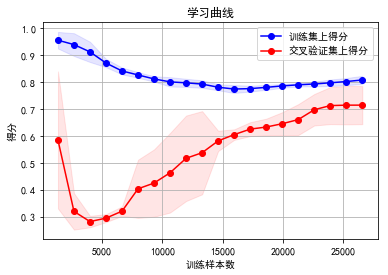

(0.733834002880352, 0.17982963342008274)

In [43]:
# 用scikit-learn里面的learning_curve来查看模型的状态，这里查看一下xgb模型状态
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

train_data = pd.read_csv("E:/招行数据比赛/data_b/训练数据集/训练数据集/训练数据集_onehot_tag.csv")
label = "flag"
ID = "id"
x_columns = [x for x in train_data.columns if x not in [label, ID]]
x = train_data[x_columns]
y = train_data[label]

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(xgb_model, u"学习曲线", x, y)